In [1]:
import sqlite3 as sql
import pandas as pd

conn = sql.connect('chinook.db')
curr = conn.cursor()


## What are the three most preferred genres?

<Axes: xlabel='music_type'>

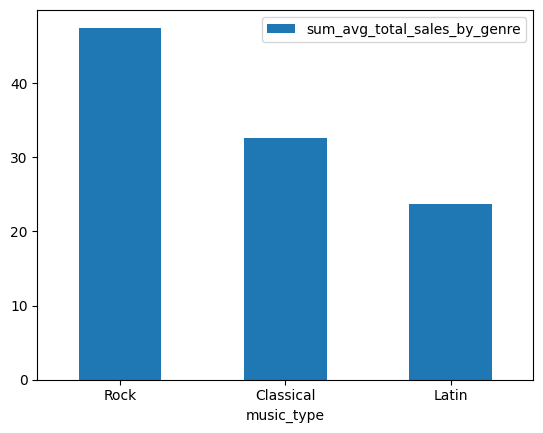

In [28]:
curr.execute(""" Select music_type , SUM(avg_total_sales) AS sum_avg_total_sales_by_genre

    FROM (SELECT DISTINCT

  Artist.Name AS artist_name,

  Genre.Name AS music_type,

  COUNT(Album.AlbumId) AS total_album,

  AVG(InvoiceLine.UnitPrice * InvoiceLine.Quantity) AS avg_total_sales

FROM Artist

JOIN Album

  ON Artist.ArtistId = Album.ArtistId

JOIN Track

  ON Album.AlbumId = Track.AlbumId

JOIN Genre

  ON Track.GenreId = Genre.GenreId

JOIN InvoiceLine

  ON Track.TrackId = InvoiceLine.TrackId

JOIN Invoice

  ON InvoiceLine.InvoiceId = Invoice.InvoiceId

GROUP BY Artist.Name)

GROUP BY music_type
             
ORDER BY 2 DESC
             """)

df2=pd.DataFrame(curr.fetchall(), columns=[i[0] for i in curr.description])

df_subset = df2.head(3)
df_subset.plot.bar(x='music_type', y='sum_avg_total_sales_by_genre', rot=0)


Based on the bar plot, the three most preferred music genres (as indicated by the highest total sales) are:

Rock - The genre with the highest sales.
Classical - The genre with the second highest sales.
Latin - The genre with the third highest sales.
Conclusion:
The bar plot suggests that Rock is the most popular genre, followed by Classical and Latin. This indicates that these three genres have the highest sales figures and are therefore the most preferred among the options displayed.

### Which country was the best buyer in 2009?

<Axes: xlabel='Country'>

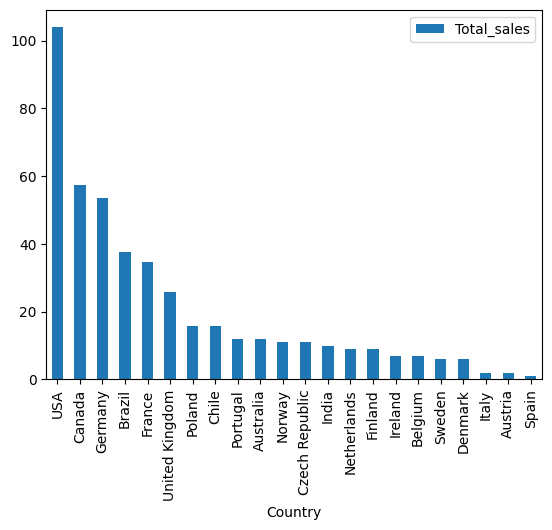

In [24]:
curr.execute("""SELECT

  Customer.Country,

  SUM(InvoiceLine.UnitPrice * InvoiceLine.Quantity) AS Total_sales

FROM Artist

JOIN Album

  ON Artist.ArtistId = Album.ArtistId

JOIN Track

  ON Album.AlbumId = Track.AlbumId

JOIN Genre

  ON Track.GenreId = Genre.GenreId

JOIN InvoiceLine

  ON Track.TrackId = InvoiceLine.TrackId

JOIN Invoice

  ON InvoiceLine.InvoiceId = Invoice.InvoiceId

JOIN Customer

  ON Invoice.CustomerId = Customer.CustomerId

WHERE Invoice.InvoiceDate BETWEEN '2009-01-01' AND '2009-12-26'

GROUP BY 1

ORDER BY 2 DESC;""")

df = pd.DataFrame(curr.fetchall(), columns=[i[0] for i in curr.description])
df.plot.bar(x='Country', y='Total_sales')


Based on the bar plot, the USA was the best buyer in 2009, as it has the highest total sales compared to other countries.


## Who was the employee with the most buys and their favorite genre?

In [31]:
curr.execute(""" SELECT DISTINCT

  Employee.FirstName,

  Employee.LastName,

  Genre.Name AS Music_Type,

  SUM(InvoiceLine.UnitPrice * InvoiceLine.Quantity) AS Total_buy

FROM Artist

JOIN Album

  ON Artist.ArtistId = Album.ArtistId

JOIN Track

  ON Album.AlbumId = Track.AlbumId

JOIN Genre

  ON Track.GenreId = Genre.GenreId

JOIN InvoiceLine

  ON Track.TrackId = InvoiceLine.TrackId

JOIN Invoice

  ON InvoiceLine.InvoiceId = Invoice.InvoiceId

JOIN Customer

  ON Invoice.CustomerId = Customer.CustomerId

JOIN Employee

  ON Customer.SupportRepId = EmployeeId

GROUP BY 1,

         2,

         3

ORDER BY 4 DESC;

""")

df = pd.DataFrame(curr.fetchall(), columns=[i[0] for i in curr.description])

df

,FirstName,LastName,Music_Type,Total_buy
0,Jane,Peacock,Rock,300.96
1,Margaret,Park,Rock,297.00
2,Steve,Johnson,Rock,228.69
3,Jane,Peacock,Latin,137.61
4,Margaret,Park,Latin,126.72
...,...,...,...,...
62,Steve,Johnson,Heavy Metal,2.97
63,Jane,Peacock,Easy Listening,1.98
64,Jane,Peacock,Pop,1.98
65,Margaret,Park,Easy Listening,1.98


The Employee Peacock , Jane has the most buys 